# Symbols and notation

Many of the aspects of maelzel.core's notation output can be customized. There are two main entry points for this: 

1. The method `setSymbol` which adds or modifies a Symbol to a Note/Chord
2. `addSpanner` adds a line/slur/bracket to two or more notes. 

## Symbols / Properties

Symbols are any elements/attributes used to customize the symbolic representation of music. A text expression, the notehead shape, an articulation:   all these are symbols. Also properties (the color of a note, its size, etc) are seen as symbols. 

In [1]:
from maelzel.core import *

ConfigDict maelzel:core, saved at /home/em/.config/maelzel/core.yaml
There are keys defined in the saved config which are not present in the default config, they will be skipped: 
   {'show.measureAnnotationFontSize'}


Many symbols can only be added to a note/chord (they are *note attached*)

In [2]:
notes = [Note(60.5, dur=1.5, offset=2).setPlay(position=0), Note(70, dur=2.5, offset=1/3).setPlay(position=1)]
notes[0].addSymbol('color', 'blue')
notes[1].addSymbol('color', 'red')

chain = Chain(notes)
chain.addSymbol(symbols.Text('error'))

chain

ValueError: A <class 'maelzel.core.chain.Chain'> does not accept note attached symbols

Calls to `addSymbol` can be chained. Also, a Symbol itself can be used as argument

[Notehead(color=red, size=1.4), Accidental(parenthesis=True), Articulation(kind=accent)]


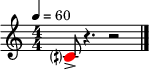

In [3]:
from maelzel.core import symbols 

n = Note(60.5, dur=0.5)

n.addSymbol('notehead', color='red', size=1.4).addSymbol('accidental', parenthesis=True)
n.addSymbol(symbols.Articulation('accent'))
print(n.symbols)
n.show()

Notice the difference between resizing the notehead alone and resizing the note itself

4C+:0.5♩:symbols=[SizeFactor(value=1.4), Accidental(parenthesis=True), Articulation(kind=accent)]
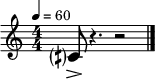

In [4]:
n = Note(60.5, dur=0.5)
n.addSymbol('sizefactor', 1.4)
n.addSymbol('accidental', parenthesis=True)
n.addSymbol('articulation', 'accent')
n

Some symbols (like size or color) are exclusive, others can be accumulated

| Symbol       | Exclusive? |
|--------------|------------|
| Color        | Yes        |
| SizeFactor   | Yes        |
| Articulation | Yes        |
| Notehead     | Yes        |
| Expression   | No         |

**NB**: dynamics are not symbols. They are treated as a constituent part of a note/chord

Color is exclusive. Only the last call to `setSymbol('color', ...)` has effect, the previous ones are overwritten  

4G+:2♩:symbols=[Color(value=red)]
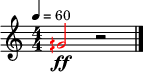

In [9]:
Note("4G+", dur=2, dynamic='ff').addSymbol('color', 'blue').addSymbol('color', 'red')

Expressions, on the other hand, can be accumulated (notice the order of appearance)

4G+:2♩:symbols=[Text('text1', placement=above), Text('text2', placement=above)]
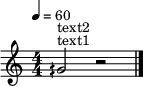

In [11]:
Note("4G+", dur=2).addSymbol(symbols.Text('text1')).addSymbol(symbols.Text('text2'))

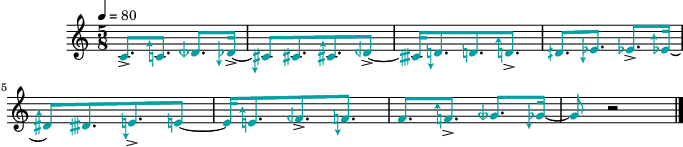

OfflineRenderer(sr=44100)
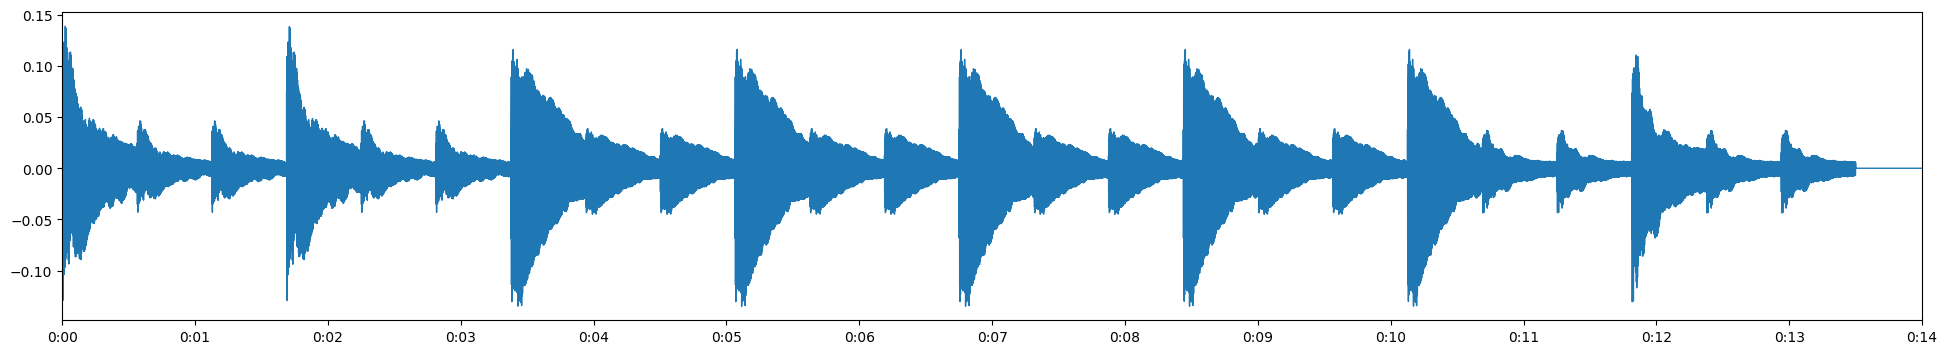

In [15]:
from IPython.display import display 

with ScoreStruct(timesig='5/8', tempo=80):
    ch = Chain([Note(60+m*0.25, dur=3/4) for m in range(24)])
    ch.addSymbol('color', '#00A0A0')
    ch.setPlay(fade=0, instr='piano')
    for n in ch:
        n.setPlay(gain=0.3)
    for n in ch[::3]:
        n.addSymbol('articulation', 'accent')
        n.setPlay(gain=0.9)
    ch.show()
    display(ch.rec(extratime=0.5, nchnls=1))


Chain([4C:0.5♩, 4C#:0.5♩, 4D:0.5♩, 4D#:0.5♩, 4E:0.5♩, 4F:0.5♩, 4F#:0.5♩, 4G:0.5♩, 4G#:0.5♩, 4A:0.5♩, …])
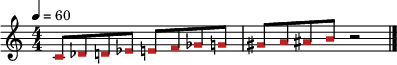

In [16]:
ch = Chain([Note(m, dur=0.5) for m in range(60, 72)])
ch.addSymbol('notehead', 'square', color='#c02020')
ch

Chain([4C:0.25♩:symbols=[Notehead(color=#000000, size=1.5)], 4C#:0.25♩:symbols=[Notehead(color=#0a0a0a, size=1.4166666666666665)], 4D:0.25♩:symbols=[Notehead(color=#151515, size=1.3333333333333335)], 4D#:0.25♩:symbols=[Notehead(color=#1f1f1f, size=1.25)], 4E:0.25♩:symbols=[Notehead(color=#2a2a2a, size=1.1666666666666667)], 4F:0.25♩:symbols=[Notehead(color=#353535, size=1.0833333333333333)], 4F#:0.25♩:symbols=[Notehead(color=#3f3f3f)], 4G:0.25♩:symbols=[Notehead(color=#4a4a4a, size=0.9166666666666666)], 4G#:0.25♩:symbols=[Notehead(color=#555555, size=0.8333333333333334)], 4A:0.25♩:symbols=[Notehead(color=#5f5f5f, size=0.75)], …])
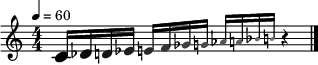

In [17]:
def rgbtohex(r, g, b):
    return '#%02x%02x%02x'% (r, g, b)
    
ch = Chain([Note(m, 0.25) for m in range(60, 72)])
for i, n in enumerate(ch):
    di = i/len(ch)
    r = di*0.5
    col = rgbtohex(int(255*r), int(255*r), int(255*r))
    n.addSymbol('notehead', color=col, size=0.5+(1-di)*1.0)
ch